# Credit Card Fraud Detection<br>
### Project Goals
- Discover drivers of fraud from credit card data
- Use these drivers to develop a machine learning model that helps predicts fraud
- This information could be used on future datasets to help detect fraud

In [1]:
# imported functions
from wrangle import *
from explore import *
from model import *
# no warnings 
import warnings
warnings.filterwarnings("ignore")

# Acquire<br>
- Data aquired from Kaggle  
- Data frame containted 1,000,000 rows and 8 columns before cleaning  
- Each row represents a credit card transaction  
- Each column represents a feature associated with the transaction  

In [2]:
# Use wrangle function to import raw data
df = wrangle_cc()
# take a peak
df.head(3)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0


# Prepare<br>
- Data came pythonic and not much was needed in terms of readability
- I checked for nulls and none were present
- I checked for outliers and though there were some, I chose to keep as they were needed

# Data Dictionary
This will help with any questions or information on this dataset

| Name                 | Definition |
| -------------------- | ---------- |
| distance_from_home | The distance from home where the transaction happened |
| distance_from_last_transaction | The distance from last transaction |
| ratio_to_median_purchase_price | Ratio of purchased price transaction to median purchase price. |
| repeat_retailer      | Binary, specifies if the transaction happened from same retailer. |
| used_chip           | Binary, specifies if the transaction through chip (credit card). |
| used_pin_number  | Binary, specifies if the transaction happened by using PIN number. |
| online_order | Binary, specifies if the transaction is an online order. |
| fraud              | Binary, specifies if the transaction is fraudulent. |


# Split data into train/validate/test sample dataframes

In [3]:
# function to split data and print shape of our splits
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = split_data(df, 
                                                                                            'fraud')

train -> (560000, 8)
validate -> (240000, 8)
test -> (200000, 8)


# Exploration<br>
- Here we will be asking some questions of our data
- We will then support these questions with visuals and statistical tests

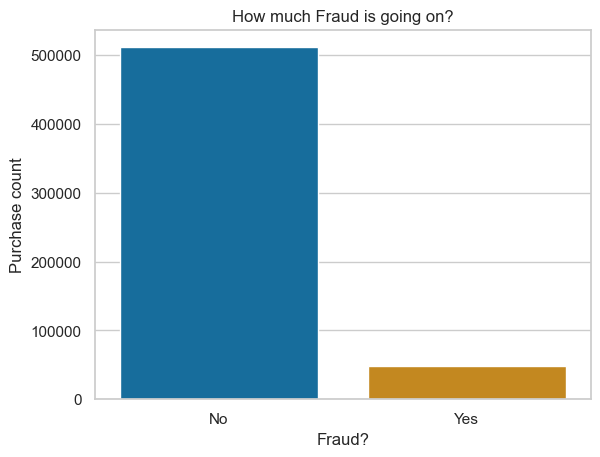

In [4]:
# function for big questions
big_question(train)

<div class="alert alert-success" role="alert">
<B>TAKEAWAY:</B> We see that while there are many purchases with no fraud, the yes number can always be lower when it comes to people and their livelihood! 
</div>

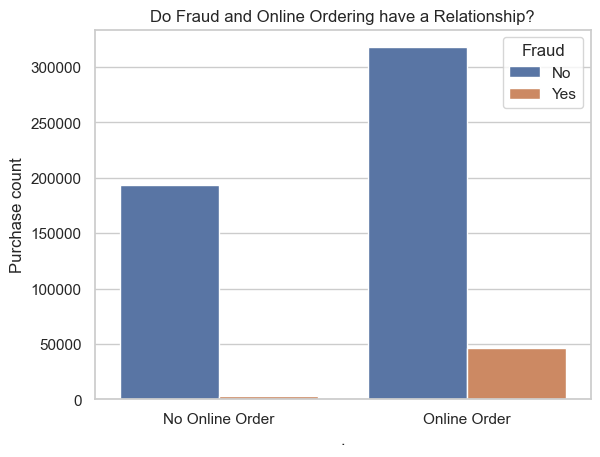

In [5]:
# function for visual 1
question_1_visual(train)

H_O: There is not a relationship between fraud and online orders  
H_A: There is a relationship bewtween fraud and use of online orders

In [6]:
# function for chi square test on question 1
question_hypothesis_test1(train)

We reject the null hypothesis, there is a relationship
chi2: 20505.323211877636
p:    0.0


<div class="alert alert-success" role="alert">
<B>TAKEAWAY:</B> According to the visual, more fraud occurs when there is an online order placed. The stats test confirmed our visual 
</div>

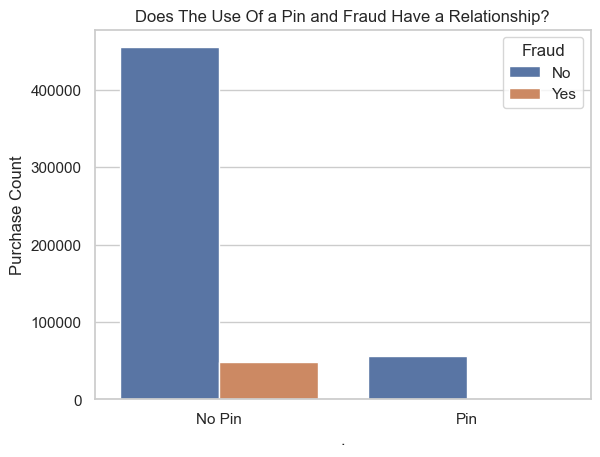

In [7]:
# function for visual 2
question_2_visual(train)

H_O: There is not a relationship between fraud and use of pin  
H_A: There is a relationship bewtween fraud and use of pin

In [8]:
# function for chi square test on question 2
question_hypothesis_test2(train)

We reject the null hypothesis, there is a relationship
chi2: 20505.323211877636
p:    0.0


<div class="alert alert-success" role="alert">
<B>TAKEAWAY:</B> According to the visual, more fraud occurs when there is no pin number used. The stats test confirmed our visual 
</div>

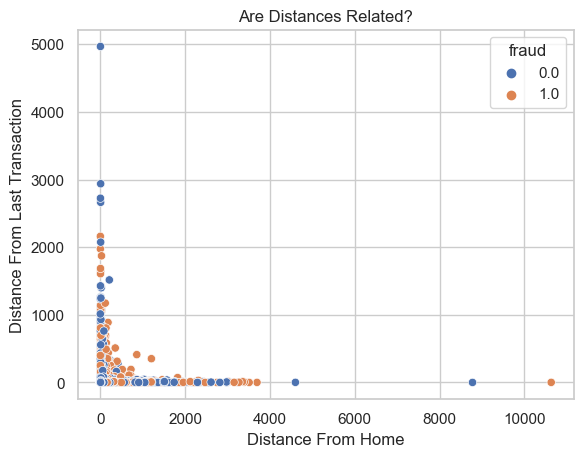

In [9]:
# function for visual 3
question_3_visual(train)

H_O: There is not a correlation between distance from last transaction and distance from home.  
H_A: There is a correlation between distance from last transaction and distance from home.  

In [10]:
# function for pearson r test on questions 3
question_hypothesis_test3(train)

We fail to reject null hypothesis
correlation: -0.00018008380848594498
p:           0.8927999856024798


<div class="alert alert-success" role="alert">
<B>TAKEAWAY:</B> Not much could be taken away from the visual other than the outliers are not always fraud.
</div>

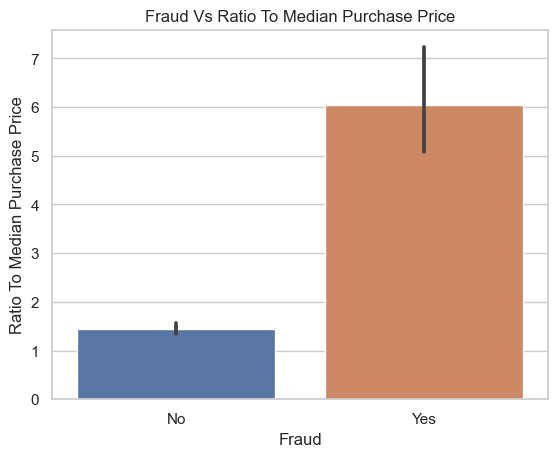

In [11]:
# function for visual 4
question_4_visual(train)

H_O: There is not a correlation between fraud and median purchase price  
H_A: There is a correlation between fraud and median purchase price

In [12]:
# function for pearson r test on question 4
question_hypothesis_test4(train)

We reject the null hypothesis, there is correlation
correlation: 0.46196634555217075
p:           0.0


<div class="alert alert-success" role="alert">
<B>TAKEAWAY:</B> More fraud occurs when the ration to median purchase price is higher. Hence, when the purchase is way higher than the average purchase price, we get suspicious.
</div>

<div class="alert alert-success" role="alert">
    
# Exploration Summary<br>
- ratio_to_median_purchase_price had some correlation
- distance_from_home also had some correlatio, but no enough to move forward
- used_pin_number proved to have significance with fraud
- online_ordering also proved to have significance with fraud<br>

#### We are moving forward to include these drivers in our model:
- ratio_to_median_purchase_price
- used_pin_number
- online_ordering
</div>

# Modeling<br>
We ran the algorithms below to see what fit the data best. Our first metric will be Accuracy and then we will using Recall

## Making the Baseline

In [13]:
# function to generate baseline for accuracy
get_baseline(df)

### Baseline: 91.26%

## Random Forest

In [14]:
# function to get random forest algorithm accuracy
get_rf(X_train, y_train, X_validate, y_validate)

Random Forest Model
Accuracy of Random Forest on train data: 99.95%
Accuracy of Random Forest on validate: 99.95%


## Logistic Regression

In [15]:
# function to get logistic regression algorithm accuracy
get_logit(X_train, y_train, X_validate, y_validate)

Logistic Regression Model
Accuracy of Logistic Regression on train: 95.73%
Accuracy of Logistic Regression on validate: 95.69%


## K Nearest Neighboor

In [16]:
# function to get knn algorithm accuracy
get_knn(X_train, y_train, X_validate, y_validate)

KNN Model
Accuracy of KNN on train: 99.38%
Accuracy of KNN on validate: 98.31%


## Descision Tree

In [17]:
# function to get knn algorithm accuracy
get_clf(X_train, y_train, X_validate, y_validate)

Decision Tree Model
Accuracy of Decision Tree on train: 99.88%
Accuracy of Decision Tree on validate: 99.87%


# Visualize All Accuracy Models

<Figure size 1100x850 with 0 Axes>

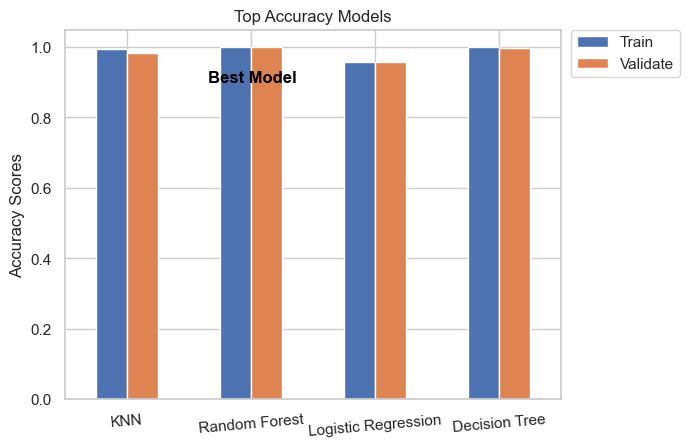

In [18]:
#function for visual of top accuracy models
get_top_acc_models(X_train, y_train, X_validate, y_validate)

<div class="alert alert-success" role="alert">
    <B>TAKEAWAY:</B> We are going with the Random Forest model for test, as it achieved the highest Accuracy on of <b>99.95%</b> and <b>99.95%</b> on Train and Validate, respectively. 
</div>

In [19]:
# function to get logistic regression algorithm recall
lr_mod(X_train, y_train, X_validate, y_validate, metric = 3, print_scores = True)

Recall for Logistic Regression classifier on training set:   0.9573
Recall for Logistic Regression classifier on validation set: 0.9569
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    218892
         1.0       0.89      0.58      0.70     21108

    accuracy                           0.96    240000
   macro avg       0.93      0.79      0.84    240000
weighted avg       0.95      0.96      0.95    240000



In [20]:
# function to get random forest algorithm recall
rand_forest(X_train, y_train, X_validate, y_validate, metric = 3, print_scores = True)

Recall for Random Forest classifier on training set:   0.9986
Recall for Random Forest classifier on validation set: 0.9987
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    218892
         1.0       0.99      1.00      0.99     21108

    accuracy                           1.00    240000
   macro avg       0.99      1.00      1.00    240000
weighted avg       1.00      1.00      1.00    240000



In [21]:
# function to get decision tree algorithm recall
dec_tree(X_train, y_train, X_validate, y_validate, metric = 3, print_scores = True)

Recall for Decision Tree classifier on training set:   0.9988
Recall for Decision Tree classifier on validation set: 0.9987
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    218892
         1.0       0.99      1.00      0.99     21108

    accuracy                           1.00    240000
   macro avg       0.99      1.00      1.00    240000
weighted avg       1.00      1.00      1.00    240000



In [22]:
# function to get k nearest neighbor algorithm recall
knn_mod(X_train, y_train, X_validate, y_validate, metric = 3, print_scores = True)

Recall for KNN classifier on training set:   0.9938
Recall for KNN classifier on validation set: 0.9831
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    218892
         1.0       0.94      0.86      0.90     21108

    accuracy                           0.98    240000
   macro avg       0.96      0.93      0.95    240000
weighted avg       0.98      0.98      0.98    240000



<Figure size 1100x850 with 0 Axes>

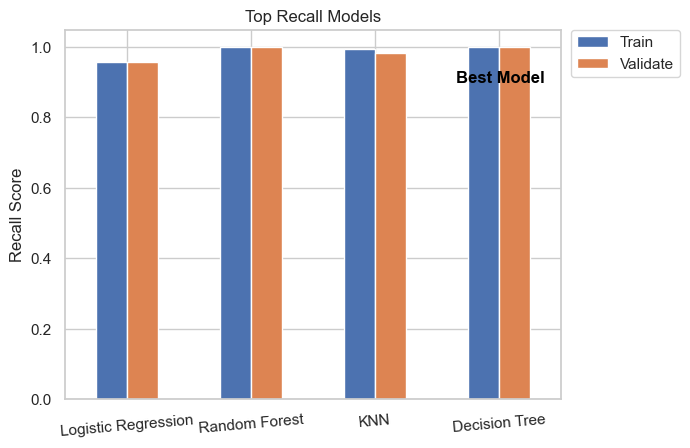

In [23]:
# function to visualize all recall models
get_top_recall_models(X_train, y_train, X_validate, y_validate)

<div class="alert alert-success" role="alert">
    <B>TAKEAWAY:</B> We are going with the Decision Tree model for test, as it achieved the highest recall on of <b>99.88%</b> and <b>99.87%</b> on Train and Validate, respectively. 
</div>

# Test Model<br>
- We are choosing the Random Forest model as it has the highest accuracy and we will be choosing the Decision tree model for Recall as it performs the best.
- We will now run our model on the test data to gauge how it will perform on unseen data.

In [24]:
# function to get test for accuracy
get_acc_test(X_train, y_train, X_test, y_test)

### Random Forest Model

### Accuracy on Test 99.94%

In [25]:
# function to get test for recall
get_recall_test(X_train, y_train, X_test, y_test)

### Decision Tree Model

### Recall Score On Test 99.87%

# Test Versus Baseline Visual

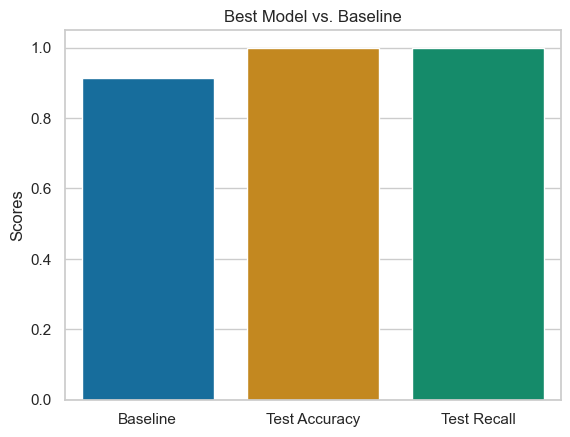

In [26]:
# functions to get visual on test vs baseline
get_mvb(X_train, y_train, X_test, y_test, df)

<div class="alert alert-success" role="alert">
    
# Modeling Wrap
* The Random Forest model outperforms the baseline and I would recommend to use this model, as it beat it by almost 9%
* Although there is no baseline for Recall, I decided to include it in the visual to show the well the score performed
</div>

# Conclusion<br>
### Summary
- ratio_to_median_purchase_price had the most correlation to fraud
- distance_from_home also had some correlatio to fraud, but no enough to move forward
- used_pin_number proved to have significance with fraud
- online_ordering also proved to have a significant relationship with fraud

# Recommendations<br>
- Adding a feature for mean purchases in a day can help with modeling
- Adding a feature for distance from work could also help as we spend most time at our homes and jobs
- Purchase amounts can be helpful as well

# Next Steps<br>
If provided more time to work on this project I would try and bin the distance and ratio to median purchase price to use for modeling.